In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("EcommerceOrders.csv")
df.head()


,order_id,customer_name,category,item_price,quantity,order_date,region
0,ORD1000,Allison Hill,Beauty,193.63,1,26/01/2024,East
1,ORD1001,Brian Yang,Beauty,77.24,2,02/10/2024,North
2,ORD1002,Javier Johnson,Electronics,204.63,5,22/01/2024,West
3,ORD1003,Lance Hoffman,Books,14.38,1,12/02/2025,South
4,ORD1004,Kimberly Robinson,Toys,154.08,1,05/11/2024,South


In [6]:
df.sample(5)

,order_id,customer_name,category,item_price,quantity,order_date,region
25,ORD1025,Christopher Becker,Toys,225.37,4,11/11/2024,West
71,ORD1071,Daniel Baker,Beauty,280.74,2,30/07/2025,East
49,ORD1049,Matthew Gomez,Books,87.15,4,20/06/2024,South
74,ORD1074,Dr. Kendra Contreras,Electronics,188.24,5,09/10/2024,North
63,ORD1063,Tyler Miller,Beauty,210.49,5,28/12/2023,West


In [14]:
df.isnull().sum()

order_id         0
customer_name    0
category         0
item_price       0
quantity         0
order_date       0
region           0
dtype: int64

In [15]:
df.duplicated().sum()


np.int64(0)

In [19]:
df['total_price'] = df['item_price'] * df['quantity']
top_categories = df.groupby('category')['total_price'].sum().sort_values(ascending=False).head(5)

df['order_date'] = pd.to_datetime(df['order_date'])
monthly_sales = df.resample('M', on='order_date')['total_price'].sum()

region_orders = df['region'].value_counts()

top_customers = df.groupby('customer_name')['total_price'].sum().sort_values(ascending=False).head(10)


print(top_categories)
print("")
print(monthly_sales)
print("")
print(region_orders)
print("")
print(top_customers)


category
Toys           8647.38
Clothing       8482.48
Electronics    8339.59
Books          7697.33
Home           5297.09
Name: total_price, dtype: float64

order_date
2023-08-31     394.76
2023-09-30    2358.85
2023-10-31    3543.47
2023-11-30    2645.16
2023-12-31    5547.37
2024-01-31    2971.12
2024-02-29    2185.28
2024-03-31     460.58
2024-04-30     331.06
2024-05-31    1264.33
2024-06-30    1403.92
2024-07-31    1571.46
2024-08-31     543.15
2024-09-30    1853.44
2024-10-31    4031.82
2024-11-30    2638.58
2024-12-31    2322.50
2025-01-31     759.90
2025-02-28     356.34
2025-03-31     633.47
2025-04-30     343.02
2025-05-31    2111.34
2025-06-30    2214.26
2025-07-31     687.76
2025-08-31     216.30
Freq: ME, Name: total_price, dtype: float64

region
South    30
East     26
North    25
West     19
Name: count, dtype: int64

customer_name
Timothy Koch        1266.45
Tammy Young         1256.05
Victoria Wyatt      1248.35
Michele Williams    1168.28
John Calhoun        1113.28

/var/folders/kv/p156wb851yjcw0pqx_jjjjg00000gn/T/ipykernel_21392/423614984.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='order_date')['total_price'].sum()


/var/folders/kv/p156wb851yjcw0pqx_jjjjg00000gn/T/ipykernel_21392/2829046952.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


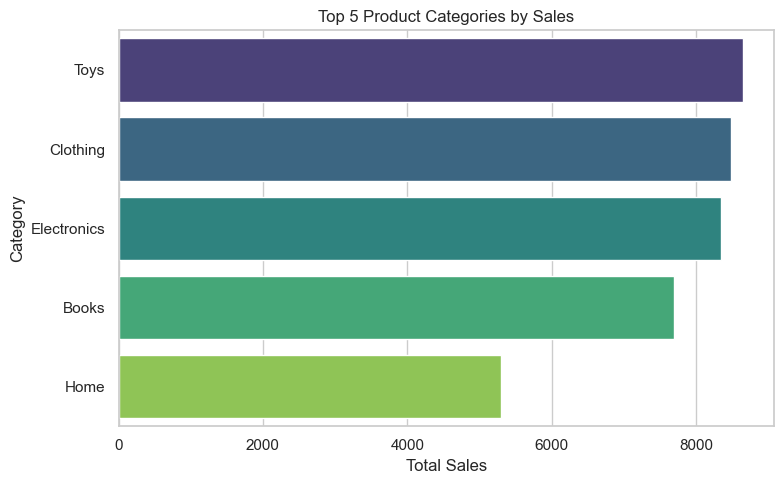

In [ ]:
#TOP 5 Product Categories by Sales

import matplotlib.pyplot as plt
import seaborn as sns


# Set the style
sns.set_style("whitegrid")

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")

# Add title and labels
plt.title("Top 5 Product Categories by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


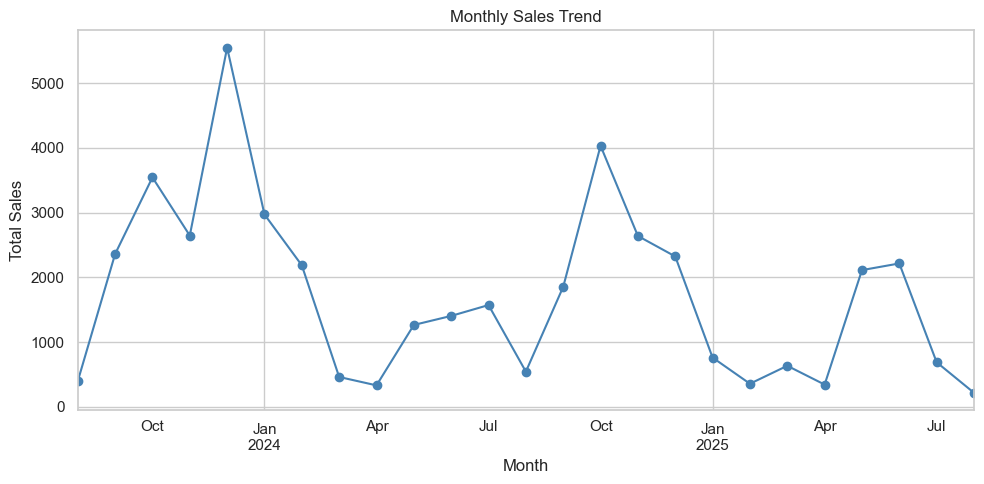

In [ ]:
# Monthly Sales Trend
plt.figure(figsize=(10, 5))
monthly_sales.plot(marker='o', color='steelblue')

plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/kv/p156wb851yjcw0pqx_jjjjg00000gn/T/ipykernel_21392/1165679801.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_orders.values, y=region_orders.index, palette="coolwarm")


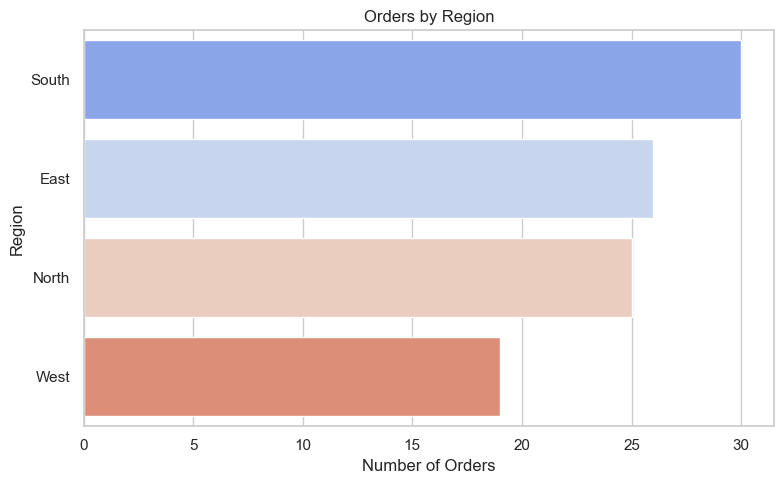

In [ ]:
# Orders by Region
plt.figure(figsize=(8, 5))
sns.barplot(x=region_orders.values, y=region_orders.index, palette="coolwarm")

plt.title("Orders by Region")
plt.xlabel("Number of Orders")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


/var/folders/kv/p156wb851yjcw0pqx_jjjjg00000gn/T/ipykernel_21392/3948826248.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette="mako")


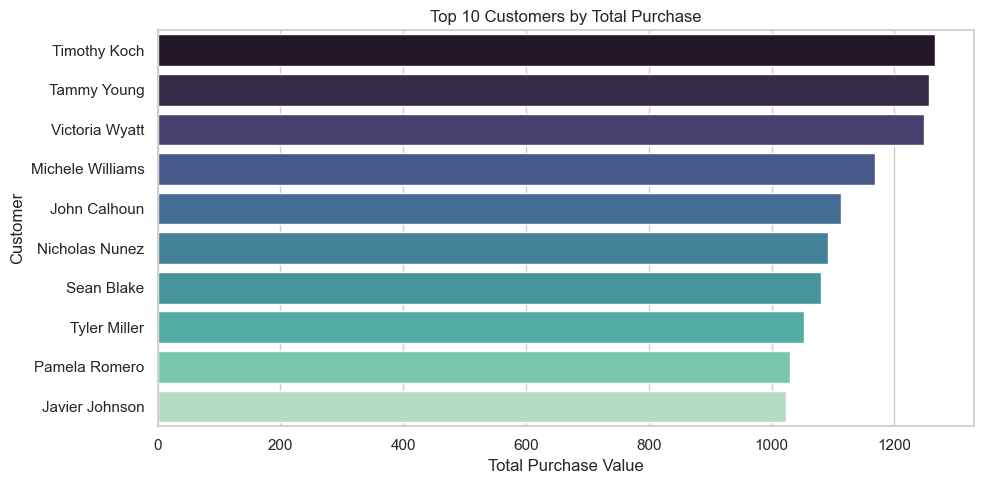

In [ ]:
# Top 10 Customers by Total Purchase
plt.figure(figsize=(10, 5))
sns.barplot(x=top_customers.values, y=top_customers.index, palette="mako")

plt.title("Top 10 Customers by Total Purchase")
plt.xlabel("Total Purchase Value")
plt.ylabel("Customer")
plt.tight_layout()
plt.show()
